In [18]:
import pandas as pd
from shapely.geometry import Point, Polygon
import geopandas as gpd # To create GeodataFrame
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
neighborhoods = pd.read_pickle('../pickles/utseus-cendus-shanghai-neighborhoods.pk')

In [20]:
neighborhoods_gdf = gpd.GeoDataFrame(neighborhoods, geometry='geometry')
neighborhoods_gdf.crs='+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

In [21]:
poly = neighborhoods_gdf['geometry'][0]

In [22]:
def recreate_polygon(poly):
    x,y = poly.exterior.coords.xy
    p = []
    for i in range(0,len(x)):
        p.append((x[i],y[i]))
    return Polygon(p)

In [23]:
ngdf = neighborhoods_gdf

In [24]:
ngdf['new_geometry'] = ngdf['geometry'].apply(recreate_polygon)

In [25]:
neighborhoods_gdf = gpd.GeoDataFrame(ngdf['new_geometry'], geometry='new_geometry')
neighborhoods_gdf.head()

,new_geometry
0,"POLYGON ((121.4216787977396 30.68471241129954,..."
1,"POLYGON ((121.4119888989075 30.69373873372381,..."
2,"POLYGON ((121.4016307330431 30.70717349199074,..."
3,"POLYGON ((121.3368669670694 30.73806038215502,..."
4,"POLYGON ((121.2514316037695 30.79176530954291,..."


In [26]:
green_df = pd.read_pickle('../pickles/beijinglab-china-park-WGS84.pk')

In [27]:
green_df.head()

,LSI,P_Parkm,A_Parkha,Level_City,Name_City,ID,geometry
0,0.959651,67.456766,0.033348,DJS,三亚,1.0,"POLYGON ((109.5156437738788 18.24999006815876,..."
1,0.883320,125.710503,0.098123,DJS,三亚,2.0,"POLYGON ((109.5158844876913 18.25020090117003,..."
2,0.904170,183.740488,0.219634,DJS,三亚,3.0,"POLYGON ((109.5142700351 18.25055613925518, 10..."
3,0.794660,138.804936,0.096820,DJS,三亚,4.0,"POLYGON ((109.5157344421038 18.2516212125748, ..."
4,0.791497,301.658463,0.453649,DJS,三亚,5.0,"POLYGON ((109.5161157651026 18.25291305904803,..."


In [28]:
shanghai_df = green_df[green_df['Name_City'] == '上海']

In [29]:
shanghai_df.head()

,LSI,P_Parkm,A_Parkha,Level_City,Name_City,ID,geometry
5639,0.848377,435.777710,1.087673,ZXS,上海,5640.0,"POLYGON ((121.3826912064864 31.00377499224829,..."
5640,0.601464,3129.668409,28.197212,ZXS,上海,5641.0,"POLYGON ((121.3684787131151 31.00861486694712,..."
5642,0.751825,1019.227261,4.672676,ZXS,上海,5643.0,"POLYGON ((121.4113908255726 31.00517496378912,..."
5644,0.893361,378.382838,0.909299,ZXS,上海,5645.0,"POLYGON ((121.4065464098904 31.01237369370081,..."
5646,0.718404,1276.784738,6.695195,ZXS,上海,5647.0,"POLYGON ((121.421843260897 31.01051081798848, ..."


In [31]:
shanghai_gdf = gpd.GeoDataFrame(shanghai_df, geometry='geometry')
shanghai_gdf.crs = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

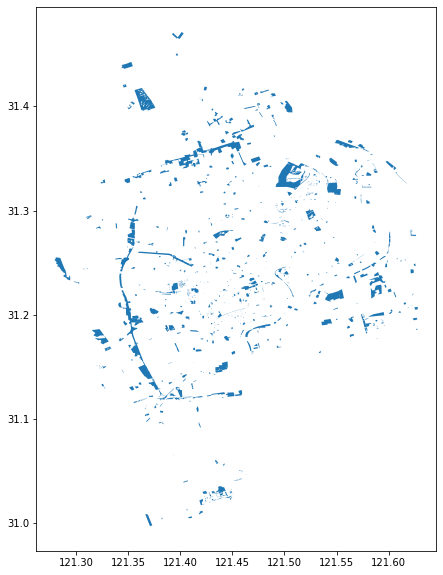

In [32]:
shanghai_gdf.plot(figsize=(15,10))

In [33]:
neighborhoods_gdf['green_area'] = 0.0

for i,poly in neighborhoods_gdf.iterrows():
    for park_poly in shanghai_gdf['geometry']:
        if poly['new_geometry'].intersects(park_poly):
            try:
                neighborhoods_gdf.at[i, "green_area"] += poly['new_geometry'].intersection(park_poly).area
                print(neighborhoods_gdf.at[i, "green_area"],poly['new_geometry'].intersection(park_poly).area)
            except:
                pass

1.0272682390265259e-06 1.0272682390265259e-06
2.7658085507622615e-05 2.6630817268596088e-05
3.2071316379180644e-05 4.413230871558029e-06
3.293019002258986e-05 8.588736434092133e-07
3.925392436048914e-05 6.323734337899281e-06
3.963263837532851e-05 3.7871401483937776e-07
3.9685926245483237e-05 5.328787015472588e-08
4.0731648015363185e-05 1.045721769879946e-06
5.260022648059235e-05 1.1868578465229162e-05
5.379828703388389e-05 1.1980605532915407e-06
5.4237576079716356e-05 4.3928904583246963e-07
5.543732311583574e-05 1.1997470361193856e-06
5.551070812087723e-05 7.338500504149049e-08
5.567327283884752e-05 1.6256471797028482e-07
5.583747731692526e-05 1.642044780777386e-07
5.614883246185545e-05 3.113551449301927e-07
5.6304279784650493e-05 1.5544732279504678e-07
5.6870372567827734e-05 5.660927831772377e-07
5.7308810327481426e-05 4.384377596536921e-07
5.744077803055203e-05 1.319677030706024e-07
5.7449150690657684e-05 8.372660105652655e-09
5.7506171433669196e-05 5.702074301151503e-08
5.7707002439

TopologyException: Input geom 1 is invalid: Self-intersection at or near point 121.3523846392448 31.271477514860791 at 121.3523846392448 31.271477514860791


1.1010984033600973e-08 1.1010984033600973e-08
1.1782746456228147e-08 7.717624226271732e-10
4.7321187327174633e-07 4.6142912681551816e-07
9.260793219963267e-07 4.5286744872458037e-07
8.80963595687732e-05 8.717028024677687e-05
9.394886165752864e-05 5.852502088755442e-06
9.437197383988587e-05 4.2311218235722175e-07
0.00010750272679196751 1.3130752952081646e-05
0.00010997885855779533 2.4761317658278216e-06
1.814039380066516e-05 1.814039380066516e-05
1.931554977444352e-05 1.1751559737783623e-06
1.2467038021149237e-07 1.2467038021149237e-07
2.729510533937252e-07 1.4828067318223282e-07
7.1319241025095384e-06 6.858973049115813e-06
7.861207975751126e-06 7.292838732415878e-07
9.474225560360762e-06 1.6130175846096356e-06
9.621109297333013e-06 1.4688373697225166e-07
9.822632653646447e-06 2.0152335631343376e-07
1.0152423669892831e-05 3.2979101624638354e-07
4.112215806047759e-06 4.112215806047759e-06
5.826425328784245e-06 1.7142095227364863e-06


TopologyException: Input geom 1 is invalid: Self-intersection at or near point 121.3523846392448 31.271477514860791 at 121.3523846392448 31.271477514860791


1.0693137874912744e-05 1.0693137874912744e-05
1.0778003726492408e-05 8.486585157966372e-08
1.2767622797985516e-05 1.9896190714931085e-06
1.620349027650009e-05 3.435867478514573e-06
5.421633621646219e-05 3.80128459399621e-05
5.916899702307974e-05 4.9526608066175535e-06
5.9382318681526455e-05 2.1332165844671606e-07
6.047191197887332e-05 1.089593297346863e-06
6.329918385594374e-05 2.827271877070416e-06
6.438599228212885e-05 1.0868084261851038e-06
9.262628379694637e-05 2.8240291514817528e-05
0.00011101399629219606 1.8387712495249684e-05
0.00011409365177219452 3.0796554799984675e-06
1.5952415559855627e-06 1.5952415559855627e-06
2.069630327442745e-06 4.743887714571823e-07
2.367172420942874e-06 2.9754209350012925e-07
2.3773292093747567e-06 1.0156788431882421e-08
8.125942463409119e-07 8.125942463409119e-07
5.43766463312218e-07 5.43766463312218e-07
2.4431839118251985e-06 1.8994174485129807e-06
2.6135657962375308e-06 1.7038188441233212e-07
3.790395261654608e-06 1.1768294654170775e-06
4.614607877

In [34]:
neighborhoods_gdf['green_area_proportion'] = neighborhoods_gdf['green_area']/neighborhoods_gdf['new_geometry'].area

In [35]:
neighborhoods_gdf[neighborhoods_gdf['green_area_proportion']>0]

,new_geometry,green_area,green_area_proportion
35,"POLYGON ((121.4435559593832 31.00937196587229,...",7.627039e-05,0.026719
47,"POLYGON ((121.3873373874259 31.03990983938138,...",1.077160e-06,0.000759
48,"POLYGON ((121.4236004365234 31.07338884677493,...",3.590252e-06,0.001591
50,"POLYGON ((121.4578856607054 31.10380264639462,...",7.202297e-05,0.020270
53,"POLYGON ((121.460623779815 31.11422181966329, ...",5.755328e-05,0.083765
57,"POLYGON ((121.3895943835079 31.13058986527315,...",1.171583e-04,0.064768
60,"POLYGON ((121.4069919810415 31.14253885418503,...",1.014359e-04,0.041333
61,"POLYGON ((121.4238264115274 31.14864106248262,...",2.264482e-06,0.006688
62,"POLYGON ((121.4539230372866 31.15021548629118,...",7.461167e-05,0.134284
66,"POLYGON ((121.3819808632442 31.15897292442907,...",3.281975e-06,0.006219


In [37]:
neighborhoods_gdf.to_pickle("../pickles/savedDF_green_spaces.pkl")